In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
from custom_data_gen import CustomDataGen
from keras import layers, models, losses
from keras.applications import MobileNetV2

In [93]:
input_shape = (224, 224, 3)
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

In [94]:
model.trainable = False

In [95]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_28[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [96]:
train = CustomDataGen("/home/shared/Mammiferes_jpg", {"Chat": 1.5, "Chien": 1.5}, batch_size=8, split="train")
test = CustomDataGen("/home/shared/Mammiferes_jpg", {"Chat": 1.5, "Chien": 1.5}, batch_size=8, split="test")

{'Coyote': 0, 'Ours': 1, 'Loup': 2, 'Ecureuil': 3, 'Rat': 4, 'Chat': 5, 'Castor': 6, 'Lynx': 7, 'Renard': 8, 'Lapin': 9, 'Chien': 10, 'Raton_laveur': 11, 'Puma': 12}
{'Coyote': 0, 'Ours': 1, 'Loup': 2, 'Ecureuil': 3, 'Rat': 4, 'Chat': 5, 'Castor': 6, 'Renard': 7, 'Lynx': 8, 'Lapin': 9, 'Chien': 10, 'Raton_laveur': 11, 'Puma': 12}


In [97]:
number_of_classes = len(train.classes)
print(f'Il y a {number_of_classes} classes.')

Il y a 13 classes.


In [98]:
image_batch, label_batch = next(iter(train))
feature_batch = model(image_batch)
print(feature_batch.shape)

(8, 7, 7, 1280)


In [99]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 1280)


In [100]:

prediction_layer = tf.keras.layers.Dense(number_of_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 13)


In [101]:
inputs = tf.keras.Input(shape=input_shape)
x = model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 13)             │        16,653 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,274,637 (8.68 MB)

 Trainable params: 16,653 (65.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [102]:
base_learning_rate = 1e-4
#weight_decay = 1e-5
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        #weight_decay= weight_decay,
        learning_rate=base_learning_rate),
    loss=losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)


In [103]:
initial_epochs = 25
history = model.fit(
    train,
    validation_data=test,
    epochs=initial_epochs,
)

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - categorical_accuracy: 0.0532 - loss: 3.2417 - val_categorical_accuracy: 0.0893 - val_loss: 3.0119
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - categorical_accuracy: 0.0501 - loss: 2.9058 - val_categorical_accuracy: 0.1250 - val_loss: 2.8584
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - categorical_accuracy: 0.0799 - loss: 2.8266 - val_categorical_accuracy: 0.1071 - val_loss: 2.8651
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - categorical_accuracy: 0.0901 - loss: 2.8289 - val_categorical_accuracy: 0.1250 - val_loss: 2.7883
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - categorical_accuracy: 0.1676 - loss: 2.7122 - val_categorical_accuracy: 0.1071 - val_loss: 2.8521
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - categorical_accuracy: 0.1569 - loss: 2.8070 - val_categorical_accuracy: 0.0714 - val_loss: 2.7155
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - categorical_accuracy: 0.1936 - lo

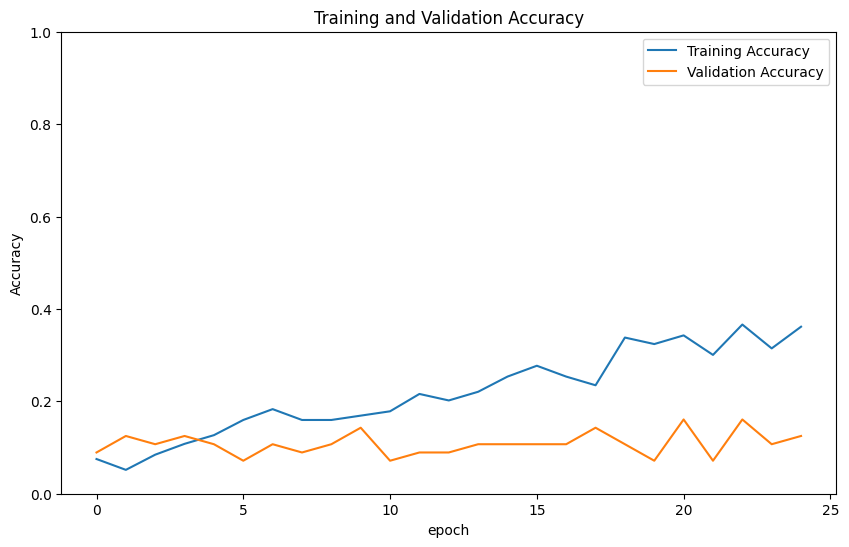

Text(0.5, 0, 'epoch')

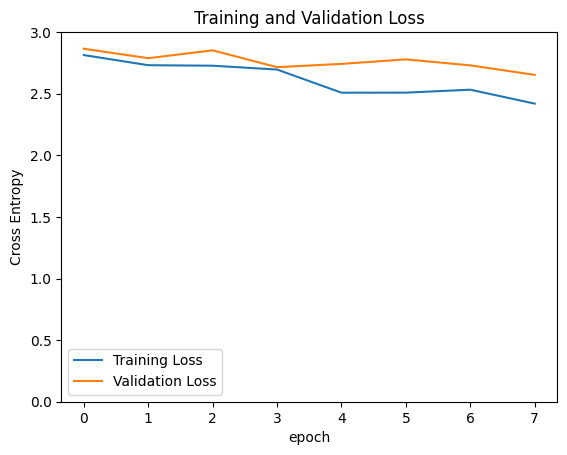

In [104]:
plt.figure(figsize=(10,6))

plt.plot(history.history["categorical_accuracy"], label='Training Accuracy')
plt.plot(history.history["val_categorical_accuracy"], label='Validation Accuracy')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history["loss"][2:10], label='Training Loss')
plt.plot(history.history["val_loss"][2:10], label='Validation Loss')
plt.legend(loc='best')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')